# Principal Component Analysis with Cancer Data

In [13]:
#Import all the necessary modules
#Import all the necessary modules
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Q1. Load the Data file ( Breast Cancer CSV) into Python DataFrame and view top 10 rows

In [24]:
data = pd.read_csv('breast-cancer-wisconsin-data.csv')
data.head()

,ID,ClumpThickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Normal Nucleoli,Bland Chromatin,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [237]:
  # Id columns is to identify rows hence can be skipped in analysis
  # All columns have numerical values
  # Class would be the target variable. Should be removed when PCA is done

# Q2 Print the datatypes of each column and the shape of the dataset. Perform descriptive analysis 

In [25]:
print(data.dtypes)
data.shape

ID                              int64
ClumpThickness                  int64
Cell Size                       int64
Cell Shape                      int64
Marginal Adhesion               int64
Single Epithelial Cell Size     int64
Bare Nuclei                    object
Normal Nucleoli                 int64
Bland Chromatin                 int64
Mitoses                         int64
Class                           int64
dtype: object


(699, 11)

# Q3 Check for missing value check, incorrect data, duplicate data and perform imputation with mean, median, mode as necessary.


In [26]:
# We could see "?" values in column, this should be removed from data set
#data = data.replace({'?':0}, inplace  = True)
a = data =='?'
print(a.sum())
# Check for missing value in any other column
data.isna().sum()

ID                              0
ClumpThickness                  0
Cell Size                       0
Cell Shape                      0
Marginal Adhesion               0
Single Epithelial Cell Size     0
Bare Nuclei                    16
Normal Nucleoli                 0
Bland Chromatin                 0
Mitoses                         0
Class                           0
dtype: int64


ID                             0
ClumpThickness                 0
Cell Size                      0
Cell Shape                     0
Marginal Adhesion              0
Single Epithelial Cell Size    0
Bare Nuclei                    0
Normal Nucleoli                0
Bland Chromatin                0
Mitoses                        0
Class                          0
dtype: int64

In [29]:
print(data.duplicated().sum())
data.drop_duplicates(keep='first',inplace = True)
data.shape

8


(691, 11)

In [30]:
data = data.drop(labels = "ID", axis = 1)
data

,ClumpThickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Normal Nucleoli,Bland Chromatin,Mitoses,Class
0,5,1,1,1,2,1.000000,3,1,1,2
1,5,4,4,5,7,10.000000,3,2,1,2
2,3,1,1,1,2,2.000000,3,1,1,2
3,6,8,8,1,3,4.000000,3,7,1,2
4,4,1,1,3,2,1.000000,3,1,1,2
5,8,10,10,8,7,10.000000,9,7,1,4
6,1,1,1,1,2,10.000000,3,1,1,2
7,2,1,2,1,2,1.000000,3,1,1,2
8,2,1,1,1,2,1.000000,1,1,5,2
9,4,2,1,1,2,1.000000,2,1,1,2


In [27]:
# No missing values found. So let us try to remove ? from bare nuclei column
data['Bare Nuclei'].replace(to_replace = '?',value = np.nan,inplace = True)
# Get count of rows having ?
data.isna().sum()


ID                              0
ClumpThickness                  0
Cell Size                       0
Cell Shape                      0
Marginal Adhesion               0
Single Epithelial Cell Size     0
Bare Nuclei                    16
Normal Nucleoli                 0
Bland Chromatin                 0
Mitoses                         0
Class                           0
dtype: int64

In [28]:
# 16 values are corrupted. We can either delete them as it forms roughly 2% of data.
# Here we would like to impute it with suitable values
data['Bare Nuclei'] = pd.to_numeric(data['Bare Nuclei'])#.astype(int)
print(data['Bare Nuclei'].mean())
data.isna().sum()
data['Bare Nuclei'].replace(to_replace = np.nan,value = data['Bare Nuclei'].mean(),inplace = True)
data.isna().sum()
data['Bare Nuclei'].value_counts()

3.5446559297218156


1.000000     402
10.000000    132
5.000000      30
2.000000      30
3.000000      28
8.000000      21
4.000000      19
3.544656      16
9.000000       9
7.000000       8
6.000000       4
Name: Bare Nuclei, dtype: int64

# Q4. Perform bi variate analysis including correlation, pairplots and state the inferences. 


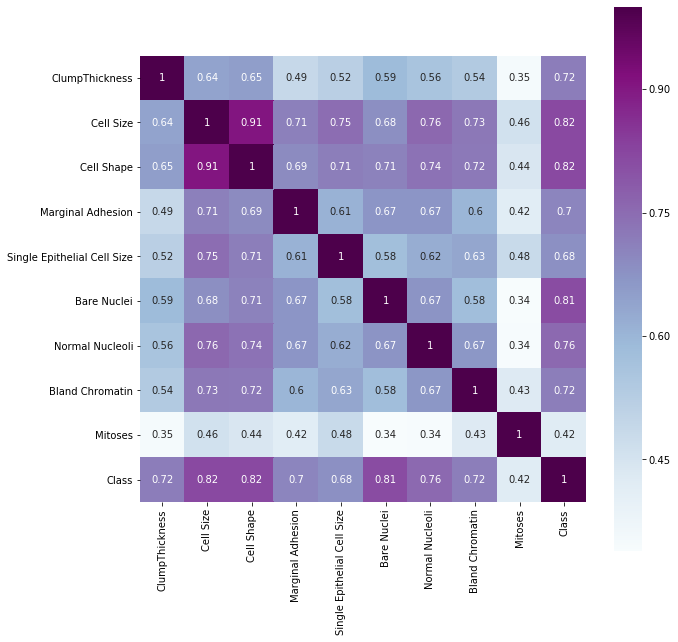

In [32]:
# Check for correlation of variable
corr = data.corr()
plt.figure(figsize = (10,10))
sns.heatmap(corr,annot = True,cmap='BuPu',square=True)

In [245]:
# Cell size shows high significance with cell shape,marginal adhesion, single epithelial cell size,bare nuclei, normal nucleoli 
# and bland chromatin
# Target variable shows high correlation with most of these variables

C:\Users\Praveen Kshma Mitra\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\Praveen Kshma Mitra\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


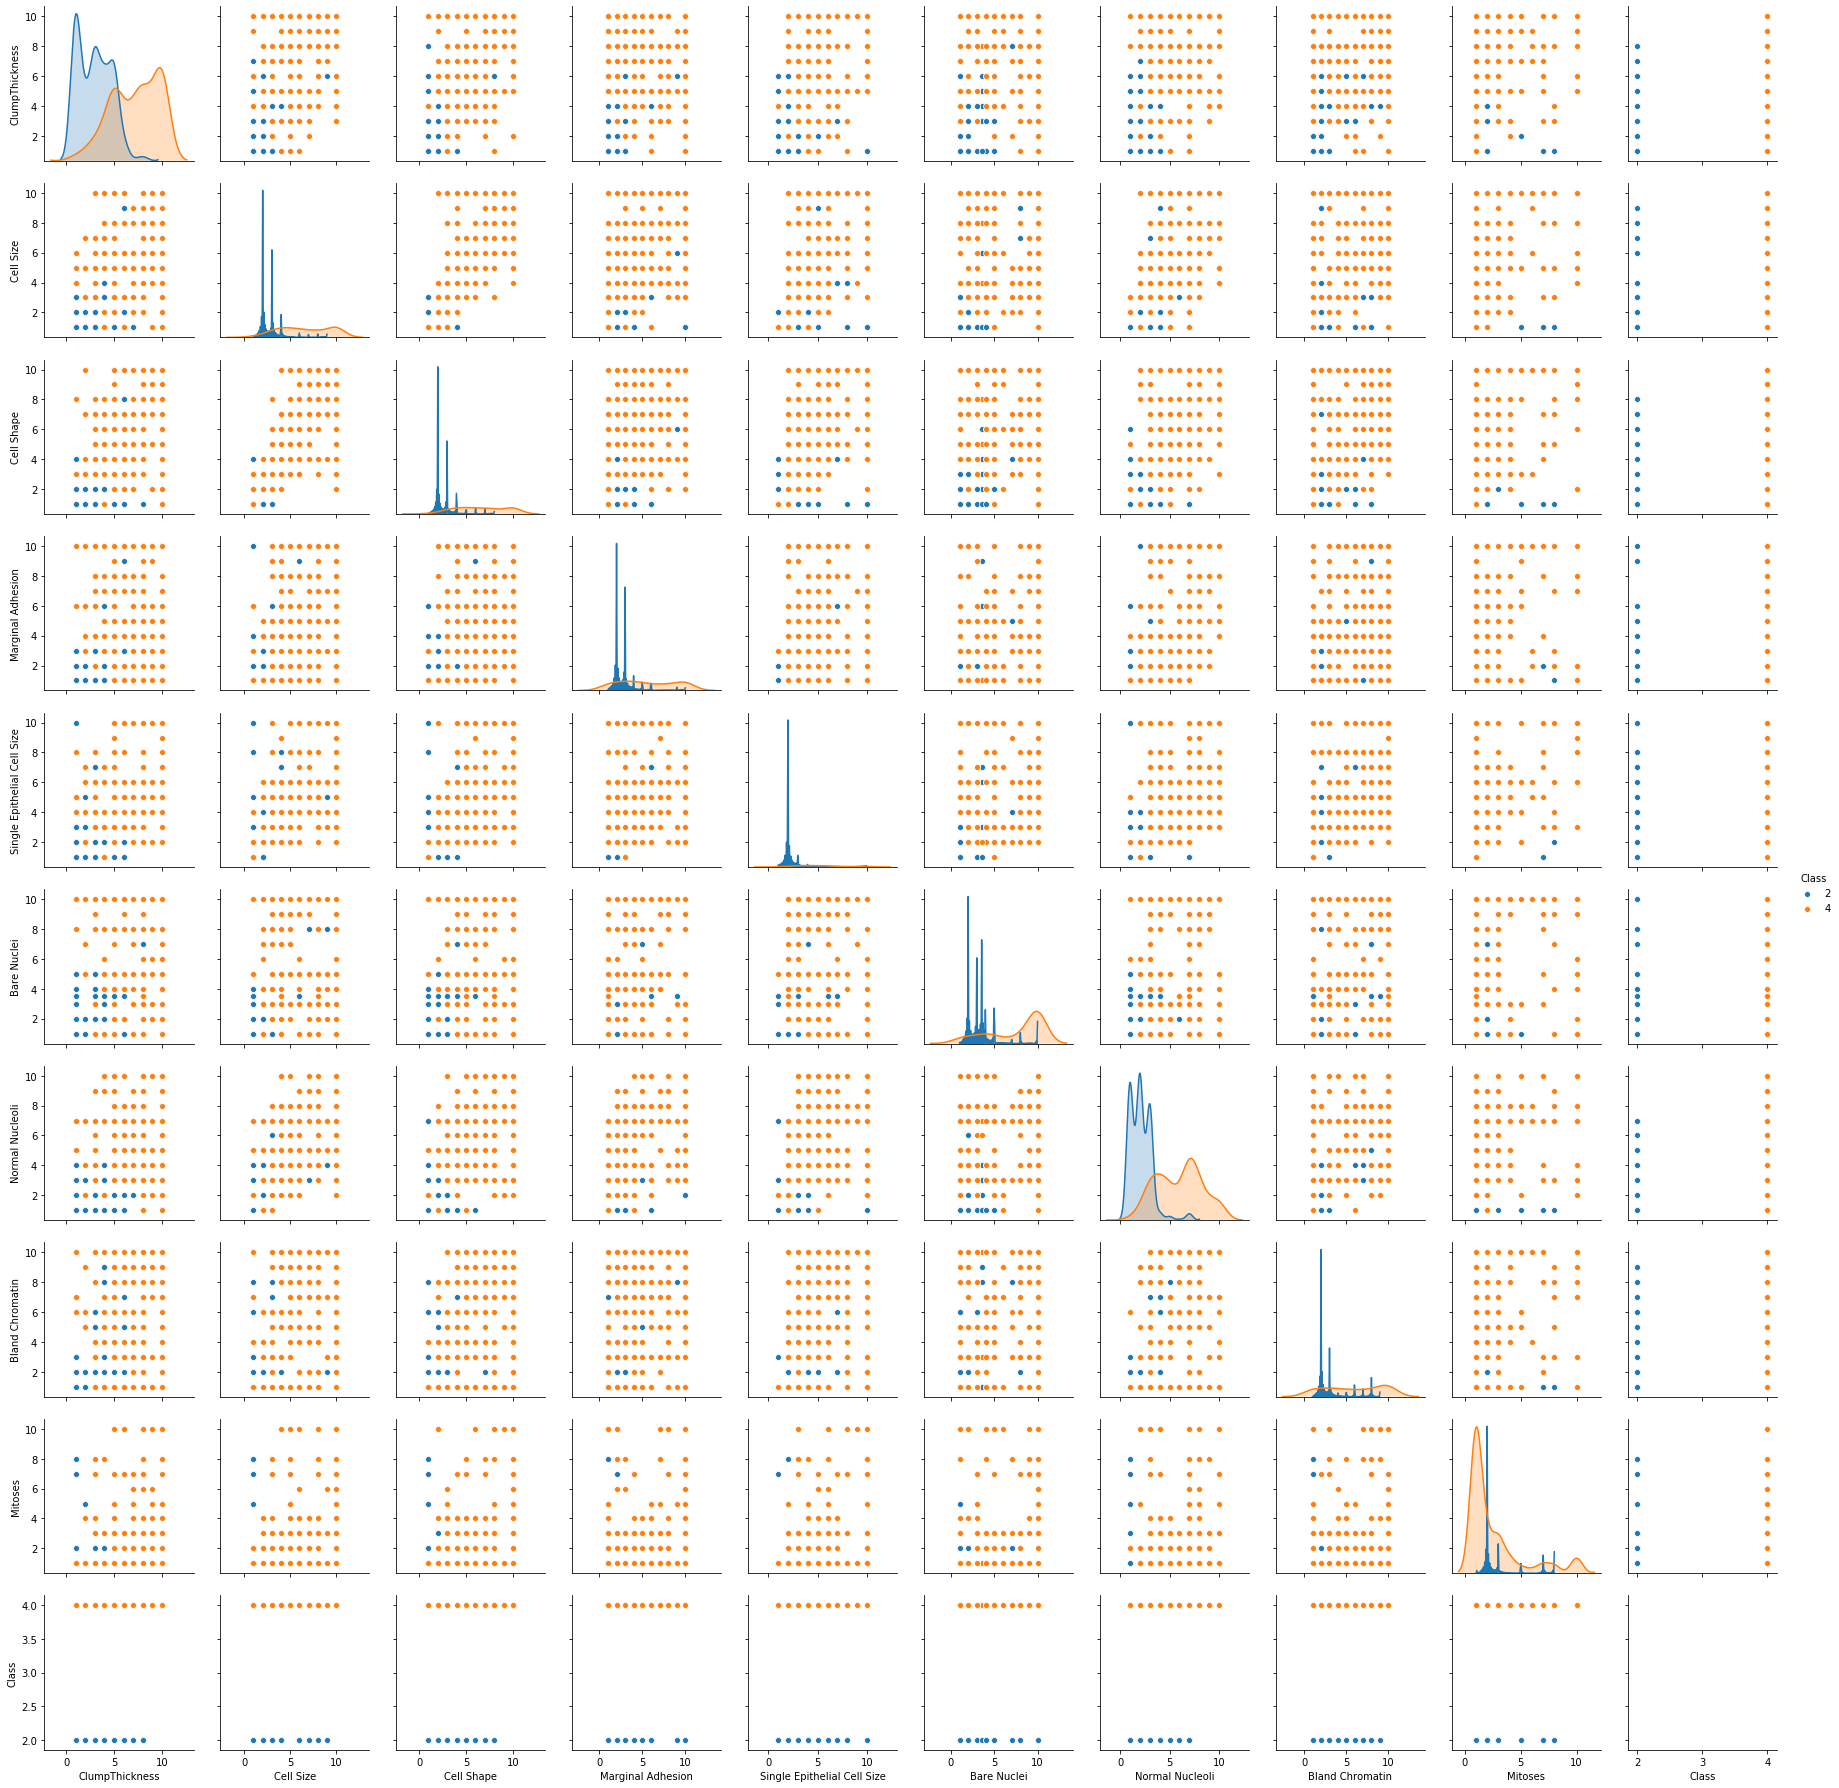

In [34]:
#Let us check for pair plots
sns.pairplot(data,hue='Class')

In [247]:
# Relationship between variables shows come correlation. 
# Distribution of variables shows most of the values are concentrated on lower side, though range remains same for all that is 
# Between 1 to 10

# Q5 Remove any unwanted columns or outliers, standardize variables in pre-processing step

In [35]:
# We could see most of the outliers are now removed.
data.isna().sum()

ClumpThickness                 0
Cell Size                      0
Cell Shape                     0
Marginal Adhesion              0
Single Epithelial Cell Size    0
Bare Nuclei                    0
Normal Nucleoli                0
Bland Chromatin                0
Mitoses                        0
Class                          0
dtype: int64

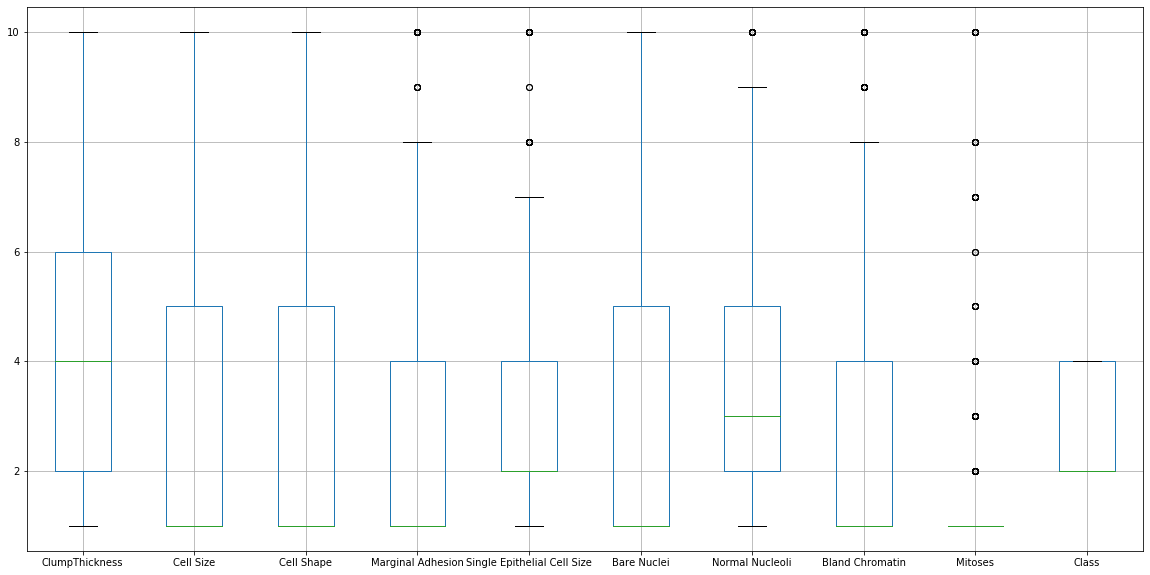

In [37]:
import matplotlib.pyplot as plt
%matplotlib inline
data.boxplot(figsize=(20,10))

In [ ]:
There are outliers in 5 features:-
1)Marginal Adhesion
2)Epithelial Cell Size
3) Normal Nucleoli
4) Mitoses
5) Bland Chromatinh

In [40]:
pd.crosstab(data['Mitoses'],data['Class'])
pd.crosstab(data['Normal Nucleoli'],data['Class'])
pd.crosstab(data['Bland Chromatin'],data['Class'])
pd.crosstab(data['Marginal Adhesion'],data['Class'])
pd.crosstab(data['Single Epithelial Cell Size'],data['Class'])

Class,2,4
Single Epithelial Cell Size,,
1,44,1
2,360,23
3,29,42
4,7,41
5,5,34
6,2,39
7,3,9
8,2,18
9,0,2


In [41]:
#sns.boxplot(data= X , kind = 'box',aspect = 3)
data['Mitoses'] = np.where(data['Mitoses']>3,3,data['Mitoses'])
data['Normal Nucleoli'] = np.where(data['Normal Nucleoli']>9,9,data['Normal Nucleoli'])
data['Bland Chromatin'] = np.where(data['Bland Chromatin']>7,7,data['Bland Chromatin'])
data['Single Epithelial Cell Size'] = np.where(data['Single Epithelial Cell Size']>7,7,data['Single Epithelial Cell Size'])
data['Marginal Adhesion'] = np.where(data['Marginal Adhesion']>8,8,data['Marginal Adhesion'])

In [39]:
data.shape

(691, 10)

In [46]:
X = data.drop(['Class'],axis = 1)
Y = data['Class']

# Q6 Create a covariance matrix for identifying Principal components

In [47]:
# PCA
# Step 1 - Create covariance matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
array = data.values
test_size = 0.30 # taking 70:30 training and test set
seed = 7  # Random numbmer seeding for reapeatability of the code
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=test_size, random_state=seed)


In [48]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()


X_train_std = sc.fit_transform(X_train)  # scale training and test data independently to prevent data leaks
X_test_std = sc.fit_transform(X_test)

In [49]:
cov_matrix = np.cov(X_train_std.T)

print('Covariance Matrix \n%s', cov_matrix)

Covariance Matrix 
%s [[1.00207469 0.65503427 0.65799257 0.52750387 0.54278528 0.58970906
  0.5946524  0.55976771 0.38964727]
 [0.65503427 1.00207469 0.91720873 0.72569045 0.78865036 0.67059336
  0.76400739 0.72799842 0.47693548]
 [0.65799257 0.91720873 1.00207469 0.70712352 0.75387759 0.70319585
  0.76543185 0.73333285 0.4348674 ]
 [0.52750387 0.72569045 0.70712352 1.00207469 0.65758817 0.67924019
  0.69105452 0.62657027 0.44516637]
 [0.54278528 0.78865036 0.75387759 0.65758817 1.00207469 0.61551181
  0.66167606 0.68948157 0.4874469 ]
 [0.58970906 0.67059336 0.70319585 0.67924019 0.61551181 1.00207469
  0.67453331 0.60518765 0.42489632]
 [0.5946524  0.76400739 0.76543185 0.69105452 0.66167606 0.67453331
  1.00207469 0.68325774 0.40105283]
 [0.55976771 0.72799842 0.73333285 0.62657027 0.68948157 0.60518765
  0.68325774 1.00207469 0.46200524]
 [0.38964727 0.47693548 0.4348674  0.44516637 0.4874469  0.42489632
  0.40105283 0.46200524 1.00207469]]


# Q7 Identify eigen values and eigen vector

In [0]:
# Step 2- Get eigen values and eigen vector

In [50]:
eig_vals, eig_vecs = np.linalg.eig(cov_matrix)
print('Eigen Vectors \n%s', eig_vecs)
print('\n Eigen Values \n%s', eig_vals)

Eigen Vectors 
%s [[-0.30281931 -0.11262833  0.01133405 -0.87223695 -0.17949942 -0.16597622
  -0.08371961  0.24489408  0.08910297]
 [-0.37447086 -0.100871   -0.72441121  0.09477007 -0.23101039  0.38452844
  -0.2887277  -0.16694257  0.05815687]
 [-0.37208505 -0.17146909  0.67394294  0.05374735 -0.18294841  0.50831035
  -0.18005756 -0.22497251 -0.01342842]
 [-0.33547935 -0.04243625  0.05077744  0.24680697  0.49802621  0.01605161
  -0.22828889  0.58714312  0.42073759]
 [-0.34345971  0.05502039  0.08589837  0.3074577  -0.29822387 -0.58535288
  -0.37861045  0.1059501  -0.43698129]
 [-0.32930915 -0.09150008 -0.08942947 -0.14702866  0.64319461  0.07215836
   0.18734781 -0.16212649 -0.61096467]
 [-0.34672737 -0.19585284  0.01082785  0.07587982  0.10475328 -0.4533682
   0.25371023 -0.56805107  0.48164295]
 [-0.33693073  0.00950078 -0.0377297   0.19026586 -0.34207694  0.0945132
   0.76306943  0.3677783  -0.07264689]
 [-0.23859397  0.94661994  0.03749108 -0.09117222  0.04782529  0.06026946
   0.0

# Q8 Find variance and cumulative variance by each eigen vector

In [63]:
tot = sum(eig_vals)
var_exp = [( i /tot ) * 100 for i in sorted(eig_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)   # array of size =  as many PC dimensions
print("Cumulative Variance Explained", cum_var_exp)
var_exp

Cumulative Variance Explained [ 67.33394049  75.26290184  80.98508313  86.04981043  89.81089873
  93.25781573  96.46244009  99.12699035 100.        ]


[67.33394049277955,
 7.928961346855845,
 5.72218128701189,
 5.064727302833703,
 3.761088295924246,
 3.446917004342705,
 3.2046243591596024,
 2.6645502602115294,
 0.8730096508809263]

# Q9 Use PCA command from sklearn and find Principal Components. Transform data to components formed

In [52]:
from sklearn.decomposition import PCA
data_pca = PCA(n_components=7)

In [53]:
data_pca.fit(X_train)

PCA(copy=True, iterated_power='auto', n_components=7, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [54]:
data_pca.transform(X_test)

array([[-5.68207636e+00, -9.57635723e-01,  1.56475758e+00, ...,
         1.58279786e-01, -7.49051219e-01, -3.76625303e-02],
       [ 2.92880794e+00, -6.09875474e+00, -5.79317617e+00, ...,
        -3.11526973e+00,  1.17787116e+00,  1.20716366e-01],
       [ 6.32792245e+00, -2.87833290e+00,  5.84342499e-01, ...,
        -1.69282802e+00, -1.99739101e+00, -6.99410850e-01],
       ...,
       [-5.82259645e+00, -1.57069024e-02,  6.23353538e-01, ...,
         1.80164709e-01, -7.51943403e-01, -2.63635565e-02],
       [-6.14200422e+00, -1.10956050e-01,  1.54382963e+00, ...,
         1.65717002e-01, -7.01726174e-01, -5.25380812e-02],
       [-5.19939483e+00,  1.43061927e-01, -1.94963374e-01, ...,
         4.24008608e-03,  9.69802327e-02,  1.12383870e-01]])

# Q10 Find correlation between components and features

In [55]:
data_new = pd.DataFrame(data_pca.components_,columns=X.columns)

In [56]:
data_new

,ClumpThickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Normal Nucleoli,Bland Chromatin,Mitoses
0,0.319408,0.431788,0.427195,0.309831,0.218958,0.459928,0.303794,0.280539,0.050771
1,0.095249,0.370777,0.284693,-0.063723,0.131376,-0.846680,0.063520,0.173666,0.004584
2,-0.920476,0.134324,0.105937,0.286931,0.128846,0.020928,0.102159,0.116764,0.004381
3,-0.192715,0.238332,0.365925,-0.818695,0.035051,0.251958,-0.187561,-0.032124,-0.031194
4,0.014448,0.298409,0.240525,0.264901,-0.061953,-0.007437,-0.190372,-0.860864,-0.038690
5,-0.050217,-0.076696,-0.006186,-0.229278,-0.212494,-0.047325,0.899141,-0.279695,-0.070085
6,0.026175,0.110334,-0.426062,-0.145000,0.845262,0.014876,0.112573,-0.215496,0.103863


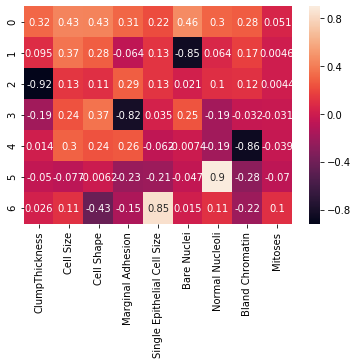

In [57]:
sns.heatmap(data_new,annot = True)

# Popularity Based Recommendation System

### About Dataset

Anonymous Ratings on jokes.

1. Ratings are real values ranging from -10.00 to +10.00 (the value "99" corresponds to "null" = "not rated").

2. One row per user

3. The first column gives the number of jokes rated by that user. The next 100 columns give the ratings for jokes 01 - 100.

# Q11 Read the dataset(jokes.csv)


In [58]:
df = pd.read_csv('jokes.csv')
df.head()

,NumJokes,Joke1,Joke2,Joke3,Joke4,Joke5,Joke6,Joke7,Joke8,Joke9,...,Joke91,Joke92,Joke93,Joke94,Joke95,Joke96,Joke97,Joke98,Joke99,Joke100
0,74,-7.82,8.79,-9.66,-8.16,-7.52,-8.50,-9.85,4.17,-8.98,...,2.82,99.00,99.00,99.00,99.00,99.00,-5.63,99.00,99.00,99.00
1,100,4.08,-0.29,6.36,4.37,-2.38,-9.66,-0.73,-5.34,8.88,...,2.82,-4.95,-0.29,7.86,-0.19,-2.14,3.06,0.34,-4.32,1.07
2,49,99.00,99.00,99.00,99.00,9.03,9.27,9.03,9.27,99.00,...,99.00,99.00,99.00,9.08,99.00,99.00,99.00,99.00,99.00,99.00
3,48,99.00,8.35,99.00,99.00,1.80,8.16,-2.82,6.21,99.00,...,99.00,99.00,99.00,0.53,99.00,99.00,99.00,99.00,99.00,99.00
4,91,8.50,4.61,-4.17,-5.39,1.36,1.60,7.04,4.61,-0.44,...,5.19,5.58,4.27,5.19,5.73,1.55,3.11,6.55,1.80,1.60


# Q12 Consider `ratings` named dataframe with only first 200 rows and all columns from 1(first column is 0) of dataset

In [59]:
ratings = df.head(200)
print(ratings.shape)

(200, 101)


# Q13 In the dataset, the null ratings are given as 99.00, so replace all 99.00s with 0
Hint: You can use `ratings.replace(<the given value>, <new value you wanted to change with>)`

In [60]:
ratings.replace(to_replace = 99.00,value = 0,inplace = True)

C:\Users\Praveen Kshma Mitra\Anaconda3\lib\site-packages\pandas\core\frame.py:4042: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  method=method)


### Popularity based recommendation system

# Q14  Find the mean for each column  in `ratings_diff` i.e, for each joke
Consider all the mean ratings and find the jokes with highest mean value and display the top 10 joke IDs.

In [62]:
ratings_diff = ratings.mean()
ratings_diff.sort_values(ascending = False).head(10)

NumJokes    70.11000
Joke50       4.05540
Joke36       3.61150
Joke53       3.57150
Joke35       3.22315
Joke29       3.18995
Joke27       3.05240
Joke62       2.86185
Joke49       2.85000
Joke32       2.77955
dtype: float64